# CLINT WP5: how to get data, calculate climatologies and anomalies on DKRZ

### 2023/11/02 - ongoing

In [12]:
import numpy as np
import pandas as pd
import xarray as xr
import os
import glob

## Rearrange longitude in files

Data are stored with longitude ranging between 0 and 360
With this function they are "translated" into -180 and 180

In [78]:
def rearrange_lon (xrdf):
    test = xrdf.assign_coords(lon=(((clim8110.lon + 180) % 360) - 180))
    test = test.sortby(test.lon)
    return(test)


## Calculate climatology from list of files

In [28]:
ERA5path = f"/work/bm1159/XCES/data4xces/reanalysis/reanalysis/ECMWF/IFS/ERA5/day/atmos/{var}/r1i1p1/"

In [30]:
#os.listdir(ERA5path)
#glob.glob(f"{ERA5path}{var}_{tres}_{product}_{experiment}_{ensemble}_*.nc")
#glob.glob(f"{ERA5path}{var}_{tres}_{product}_{experiment}_{ensemble}_*.nc")

In [73]:

def calc_clim (var,tres,product,experiment,ensemble,year_start,year_stop,path):
    list4clim = [f"{ERA5path}{var}_{tres}_{product}_{experiment}_{ensemble}_{y}0101-{y}1231.nc" for y in range(year_start,year_stop+1)]
    baseclim = xr.open_mfdataset(list4clim)
    xr_clim = baseclim.groupby("time.dayofyear").mean("time")
    return (xr_clim)

## Main

In [87]:
experiment = 'era5'
product = 'reanalysis'
var = 'tasmax'
tres = 'day'
ensemble = 'r1i1p1'
year_start = 1981
year_stop = 2010
ERA5path = f"/work/bm1159/XCES/data4xces/reanalysis/reanalysis/ECMWF/IFS/ERA5/day/atmos/{var}/r1i1p1/"
path = ERA5path

test1 = calc_clim (var,tres,product,experiment,ensemble,year_start,year_stop,path)
test2 = rearrange_lon(test1)

In [50]:
#clim8110.sel(dayofyear=173,lat=slice(30,70),lon=slice(-14,46))['tasmax'].plot()


# test.sel(dayofyear=173,lat=slice(30,70),lon=slice(-14,46))['tasmax'].plot()

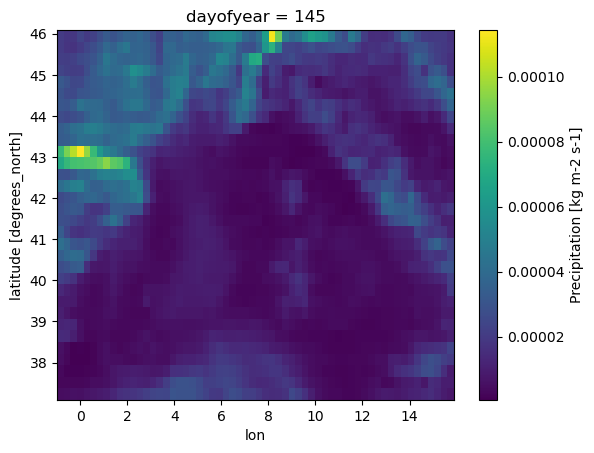